In [1]:
import pandas as pd

In [2]:
import numpy as np
import plotly as plt
import yfinance as yf

In [3]:
#DEFINING TICKER
tickers = ['HINDUNILVR.NS','ITC.NS','LT.NS','HINDCOPPER.NS','NTPC.NS','KEI.NS','HILTON.NS','BSOFT.NS','DIVISLAB.NS','JSWSTEEL.NS']



In [4]:
#DEFINING RANGE
start_date = '2017-01-01'
end_date = '2025-03-31'

In [5]:
#Creating an Empty Dictionary for data storage
stock_data = {}

#Fetching the data
for ticker in tickers:
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")
  stock_data[ticker] = data
  print(f"Data for {ticker} fetched successfully")

/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for HINDUNILVR.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for ITC.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for LT.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for HINDCOPPER.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for NTPC.NS fetched successfully


[*********************100%***********************]  1 of 1 completed


Data for KEI.NS fetched successfully


/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for HILTON.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for BSOFT.NS fetched successfully


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-5-2504006794.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval = "1D")


Data for DIVISLAB.NS fetched successfully


[*********************100%***********************]  1 of 1 completed

Data for JSWSTEEL.NS fetched successfully


In [6]:
print(data.head())

Price            Close        High         Low        Open      Volume
Ticker     JSWSTEEL.NS JSWSTEEL.NS JSWSTEEL.NS JSWSTEEL.NS JSWSTEEL.NS
Date                                                                  
2017-01-02  147.913879  148.597204  145.723637  147.343701     4621360
2017-01-03  148.841553  149.660630  147.615201  148.520260     4530490
2017-01-04  147.569977  150.918695  145.352583  150.918695     2378943
2017-01-05  158.973679  159.878738  147.977212  148.474998     6510132
2017-01-06  158.566422  161.824641  156.349028  160.512308     5500626


In [7]:
# Flattening the multi level column structure into single-level column structure
for ticker in tickers:
  stock_data[ticker].columns = ['_'.join(col).strip() for col in stock_data[ticker].columns.values]

In [8]:
#Formatting into a table with adjusted close values
adj_close = pd.DataFrame()

for ticker in tickers:
  adj_close[ticker] = stock_data[ticker].iloc[:, 0]

display(adj_close.head())

,HINDUNILVR.NS,ITC.NS,LT.NS,HINDCOPPER.NS,NTPC.NS,KEI.NS,HILTON.NS,BSOFT.NS,DIVISLAB.NS,JSWSTEEL.NS
Date,,,,,,,,,,
2017-01-02,724.361206,179.075241,786.598450,60.758942,107.640221,122.088654,16.780172,73.159233,749.031250,147.913879
2017-01-03,728.310425,180.858948,790.995422,59.658581,108.064751,122.968391,16.968185,73.186226,730.254944,148.841553
2017-01-04,721.070007,182.419662,796.433777,59.323692,107.672874,122.333031,17.062193,74.050095,706.268433,147.569977
2017-01-05,731.206848,183.385818,805.516968,60.711102,107.770844,123.212776,17.861246,74.293068,717.252502,158.973679
2017-01-06,731.733337,180.375824,804.735901,59.562901,107.117699,131.863571,17.767241,72.727295,692.280151,158.566422


In [9]:
adj_close.to_csv("nifty10_adjclose.csv")

In [10]:
#Calculating returns
returns = adj_close.pct_change().dropna()
display(returns.head())
returns.to_csv("nifty10_daily_returns.csv")


,HINDUNILVR.NS,ITC.NS,LT.NS,HINDCOPPER.NS,NTPC.NS,KEI.NS,HILTON.NS,BSOFT.NS,DIVISLAB.NS,JSWSTEEL.NS
Date,,,,,,,,,,
2017-01-03,0.005452,0.009961,0.005590,-0.018110,0.003944,0.007206,0.011204,0.000369,-0.025067,0.006272
2017-01-04,-0.009941,0.008629,0.006875,-0.005613,-0.003626,-0.005167,0.005540,0.011804,-0.032847,-0.008543
2017-01-05,0.014058,0.005296,0.011405,0.023387,0.000910,0.007191,0.046832,0.003281,0.015552,0.077277
2017-01-06,0.000720,-0.016413,-0.000970,-0.018913,-0.006060,0.070210,-0.005263,-0.021076,-0.034817,-0.002562
2017-01-09,-0.003239,0.012979,-0.007405,0.036948,-0.005793,-0.005930,-0.005291,0.021158,-0.004407,0.004852


In [11]:
log_returns = np.log(adj_close/adj_close.shift(1)).dropna()
display(log_returns.head())
log_returns.to_csv("nifty10_log_returns.csv")

,HINDUNILVR.NS,ITC.NS,LT.NS,HINDCOPPER.NS,NTPC.NS,KEI.NS,HILTON.NS,BSOFT.NS,DIVISLAB.NS,JSWSTEEL.NS
Date,,,,,,,,,,
2017-01-03,0.005437,0.009911,0.005574,-0.018276,0.003936,0.007180,0.011142,0.000369,-0.025387,0.006252
2017-01-04,-0.009991,0.008592,0.006852,-0.005629,-0.003633,-0.005180,0.005525,0.011735,-0.033398,-0.008580
2017-01-05,0.013960,0.005282,0.011340,0.023118,0.000909,0.007166,0.045768,0.003276,0.015433,0.074436
2017-01-06,0.000720,-0.016550,-0.000970,-0.019094,-0.006079,0.067855,-0.005277,-0.021301,-0.035437,-0.002565
2017-01-09,-0.003244,0.012895,-0.007432,0.036282,-0.005810,-0.005948,-0.005305,0.020937,-0.004417,0.004840


In [12]:
#importing crude oil prices
crude = yf.download('BZ=F', start = '2017-01-01', end = '2025-03-31', interval = '1D')['Close']

/tmp/ipython-input-12-223132231.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  crude = yf.download('BZ=F', start = '2017-01-01', end = '2025-03-31', interval = '1D')['Close']
[*********************100%***********************]  1 of 1 completed


In [13]:
#saving crude oil data to csv
crude.to_csv("crude_oil_prices.csv")

In [14]:
#importing inr to usd prices
inr = yf.download('INR=X', start = '2017-01-01', end = '2025-03-31', interval = '1D')['Close']
inr.to_csv("inr_usd_prices.csv")

/tmp/ipython-input-14-2762451972.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  inr = yf.download('INR=X', start = '2017-01-01', end = '2025-03-31', interval = '1D')['Close']
[*********************100%***********************]  1 of 1 completed


In [15]:
inr = pd.read_csv("inr_usd_prices.csv")
inr.head(15)
inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2146 non-null   object 
 1   INR=X   2146 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.7+ KB


In [16]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 2017-01-03 to 2025-03-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BZ=F    2073 non-null   float64
dtypes: float64(1)
memory usage: 32.4 KB


In [17]:
inr.to_csv("inr_usd_prices.csv")

In [18]:
macros_df = pd.read_csv("macros_to_be_used.csv")
#converting date column to date time index
macros_df['Date'] = pd.to_datetime(macros_df['Date'], format='%d-%m-%Y')
macros_df = macros_df.set_index('Date')
#resampling the daily data to monthly data and taking the average to smooth out the noise
macros_df = macros_df.resample('ME').mean()
macros_df.head(15)

,Crude_Oil_Brent,USD_INR,VIX
Date,,,
2017-01-31,55.427000,68.090730,15.429875
2017-02-28,55.926843,67.081263,13.571447
2017-03-31,52.505652,66.058561,12.676413
2017-04-30,53.818947,64.636732,11.560132
2017-05-31,51.349546,64.335772,11.247500
2017-06-30,47.540000,64.448318,11.243409
2017-07-31,49.125500,64.510619,11.261375
2017-08-31,51.906956,64.048092,13.227065
2017-09-30,55.652000,64.082765,12.286500


In [19]:
monthly_returns = pd.read_csv("nifty10_log_returns.csv")
monthly_returns['Date'] = pd.to_datetime(monthly_returns['Date'])
monthly_returns = monthly_returns.set_index('Date')
#This will give the average return of the whole portfolio in a month
portfolio_returns = monthly_returns.mean(axis=1).resample('ME').mean()
portfolio_returns.head(15)

,0
Date,
2017-01-31,0.002108
2017-02-28,0.003252
2017-03-31,-0.001270
2017-04-30,0.002813
2017-05-31,0.000328
2017-06-30,0.002777
2017-07-31,0.003438
2017-08-31,-0.001459
2017-09-30,0.001910


In [20]:
#COMBINING THE MACROS DATASET AND THE MONTHLY PORTFOLIO DATA SETA

In [21]:
combined_df = pd.concat([portfolio_returns, macros_df], axis=1).dropna()
combined_df.head(15)
combined_df.to_csv("combined_df.csv")

In [22]:
combined_df = pd.read_csv("Update_Final_Dataset.csv")
combined_df.head(15)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.corr()


/tmp/ipython-input-22-2943718403.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_df['Date'] = pd.to_datetime(combined_df['Date'])


,Date,Average_Monthly_Returns,Crude_Oil_Brent,USD_INR,VIX
Date,1.000000,-0.005166,0.549541,0.961516,-0.043938
Average_Monthly_Returns,-0.005166,1.000000,-0.027617,0.004490,-0.273948
Crude_Oil_Brent,0.549541,-0.027617,1.000000,0.467878,-0.318951
USD_INR,0.961516,0.004490,0.467878,1.000000,-0.047896
VIX,-0.043938,-0.273948,-0.318951,-0.047896,1.000000


In [23]:
#We can observe that there is an inverse relationship b/w crude_oil prices and portfolio returns as well as portfolio return and VIX

In [24]:
combined_df.describe()

,Date,Average_Monthly_Returns,Crude_Oil_Brent,USD_INR,VIX
count,98,98.000000,98.000000,98.000000,98.000000
mean,2021-02-13 14:12:14.693877504,0.000808,70.788461,74.501207,16.874218
min,2017-01-31 00:00:00,-0.013607,26.631429,63.751052,10.987976
25%,2019-02-07 00:00:00,-0.000990,59.754606,70.133670,13.394813
50%,2021-02-14 00:00:00,0.000714,72.883536,73.951942,15.049940
75%,2023-02-21 00:00:00,0.002912,81.553357,81.848490,18.751190
max,2025-02-28 00:00:00,0.007881,117.663810,84.238505,55.378182
std,NaN,0.003187,17.468125,6.382561,6.233632


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

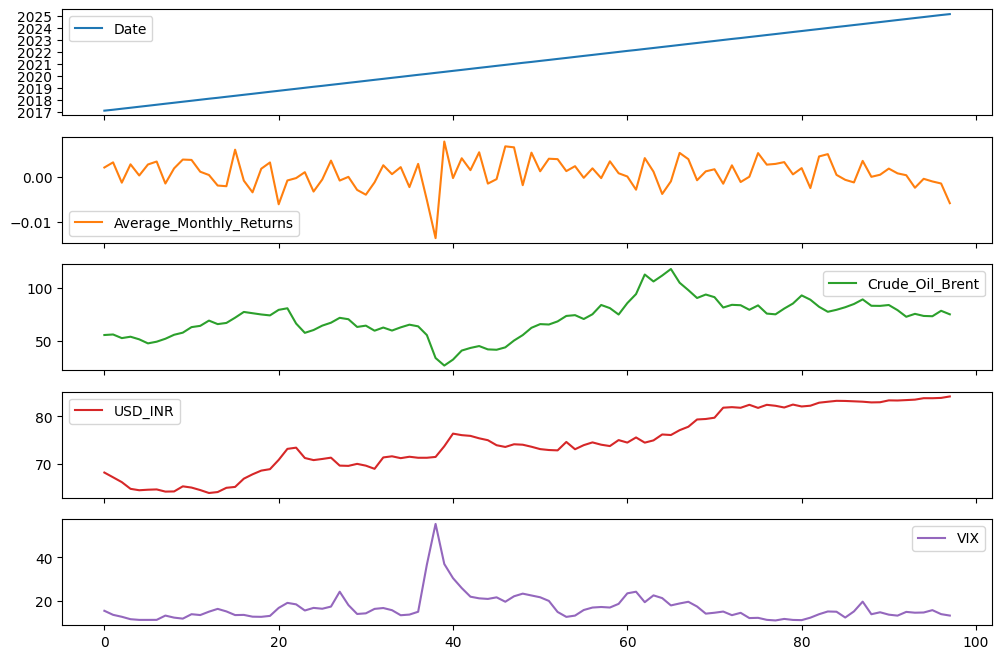

In [25]:
combined_df.plot(subplots=True, figsize=(12,8))

In [26]:
import statsmodels.api as sm

In [27]:
#building a basic regression model as a base line
X = combined_df[['USD_INR','VIX','Crude_Oil_Brent']]
Y = combined_df['Average_Monthly_Returns']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Average_Monthly_Returns   R-squared:                       0.093
Model:                                 OLS   Adj. R-squared:                  0.064
Method:                      Least Squares   F-statistic:                     3.210
Date:                     Thu, 03 Jul 2025   Prob (F-statistic):             0.0265
Time:                             19:09:23   Log-Likelihood:                 429.60
No. Observations:                       98   AIC:                            -851.2
Df Residuals:                           94   BIC:                            -840.9
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [28]:
stress_scenario = pd.DataFrame({
    'const': [1],
    'USD_INR': [combined_df['USD_INR'].mean() * 1.15],
    'India_VIX': [combined_df['VIX'].mean() * 1.55],
    'Crude_Oil_Brent': [combined_df['Crude_Oil_Brent'].mean() * 1.63]
})

predicted_return = model.predict(stress_scenario)
print(f"Expected Portfolio Return under stress: {predicted_return[0]:.4f}")


Expected Portfolio Return under stress: -0.0017


In [29]:
import numpy as np

VaR_99 = np.percentile(combined_df['Average_Monthly_Returns'], 1)
VaR_99

np.float64(-0.006304501590000001)

In [30]:
CVar_99 = combined_df[combined_df['Average_Monthly_Returns']<=VaR_99]['Average_Monthly_Returns'].mean()
CVar_99

np.float64(-0.013606907)

In [31]:
#checking the volatility of individual stocks vs the portfolio
portfolio_log_returns = pd.read_csv("nifty10_log_returns.csv")
portfolio_log_returns['Date'] = pd.to_datetime(portfolio_log_returns['Date'])
portfolio_log_returns.head()

,Date,HINDUNILVR.NS,ITC.NS,LT.NS,HINDCOPPER.NS,NTPC.NS,KEI.NS,HILTON.NS,BSOFT.NS,DIVISLAB.NS,JSWSTEEL.NS
0,2017-01-03,0.005437,0.009911,0.005574,-0.018276,0.003936,0.007180,0.011142,0.000369,-0.025387,0.006252
1,2017-01-04,-0.009991,0.008592,0.006852,-0.005629,-0.003633,-0.005180,0.005525,0.011735,-0.033398,-0.008580
2,2017-01-05,0.013960,0.005282,0.011340,0.023118,0.000909,0.007166,0.045768,0.003276,0.015433,0.074436
3,2017-01-06,0.000720,-0.016550,-0.000970,-0.019094,-0.006079,0.067855,-0.005277,-0.021301,-0.035437,-0.002565
4,2017-01-09,-0.003244,0.012895,-0.007432,0.036282,-0.005810,-0.005948,-0.005305,0.020937,-0.004417,0.004840


In [32]:
#Calculating individual volatility of each stock (annually)
stock_volatility = portfolio_log_returns.std()*np.sqrt(252)
stock_volatility

,0
Date,13798 days 20:01:43.570994432
HINDUNILVR.NS,0.221825
ITC.NS,0.247388
LT.NS,0.266899
HINDCOPPER.NS,0.495983
NTPC.NS,0.2696
KEI.NS,0.442448
HILTON.NS,0.586125
BSOFT.NS,0.424761
DIVISLAB.NS,0.316277


In [33]:
#Calculate Daily Portfolio Return
portfolio_log_returns = portfolio_log_returns.set_index('Date')
portfolio_return = portfolio_log_returns.mean(axis=1)
portfolio_return

,0
Date,
2017-01-03,0.000614
2017-01-04,-0.003371
2017-01-05,0.020069
2017-01-06,-0.003870
2017-01-09,0.004280
...,...
2025-03-24,0.016642
2025-03-25,-0.012436
2025-03-26,-0.012936


In [34]:
#Calculating the portfolio volatility
portfolio_volatility = portfolio_return.std()*np.sqrt(252)
portfolio_volatility

np.float64(0.19881322012062982)

In [35]:
#Portfolio annualized volatility is lower than individual stock volatility

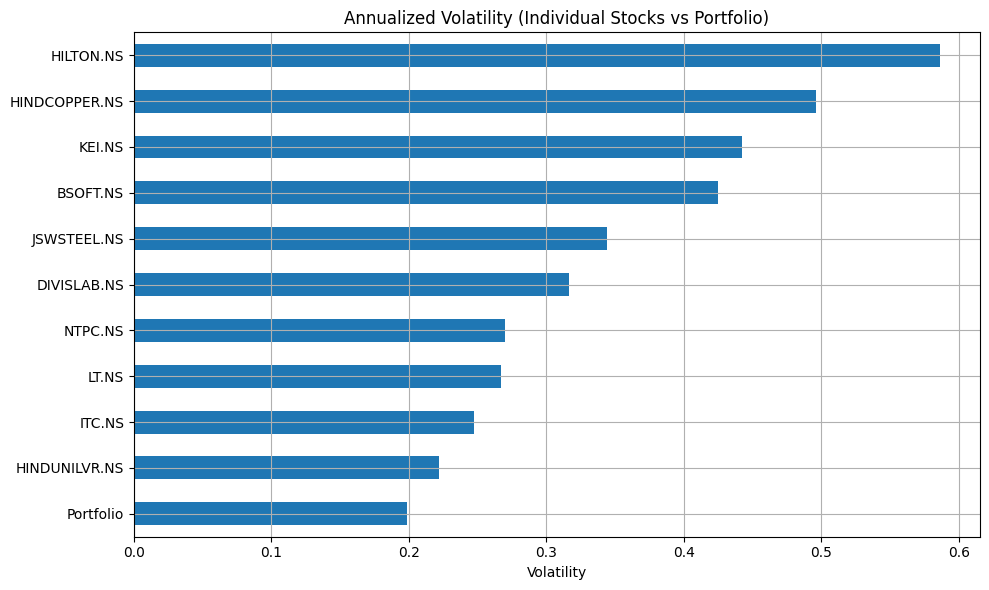

In [36]:
import matplotlib.pyplot as plt

# Append portfolio volatility for comparison
stock_volatility['Portfolio'] = portfolio_volatility

# Remove the 'Date' entry which is a Timedelta and cannot be plotted
stock_volatility = stock_volatility.drop('Date')

# Plot
stock_volatility.sort_values().plot(kind='barh', figsize=(10,6), title="Annualized Volatility (Individual Stocks vs Portfolio)")
plt.xlabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

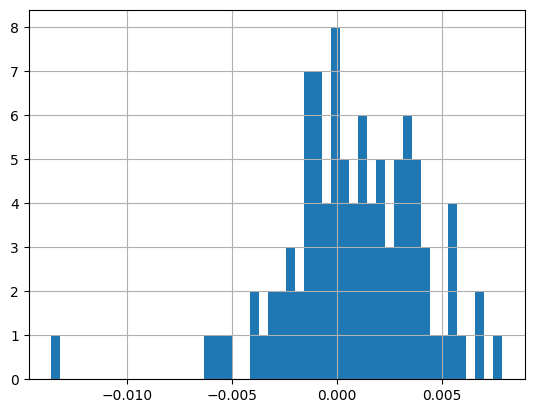

In [37]:
combined_df['Average_Monthly_Returns'].hist(bins=50)

In [38]:
extreme_scenario = pd.DataFrame({
    'const': [1],
    'USD_INR': [combined_df['USD_INR'].mean() * 1.25],
    'India_VIX': [combined_df['VIX'].mean() * 2],
    'Crude_Oil_Brent': [combined_df['Crude_Oil_Brent'].mean() * 1.9]
})

predicted_return_extreme = model.predict(extreme_scenario)
print(f"Expected Portfolio Return under extreme stress: {predicted_return_extreme[0]:.4f}")

Expected Portfolio Return under extreme stress: -0.0032


<Axes: >

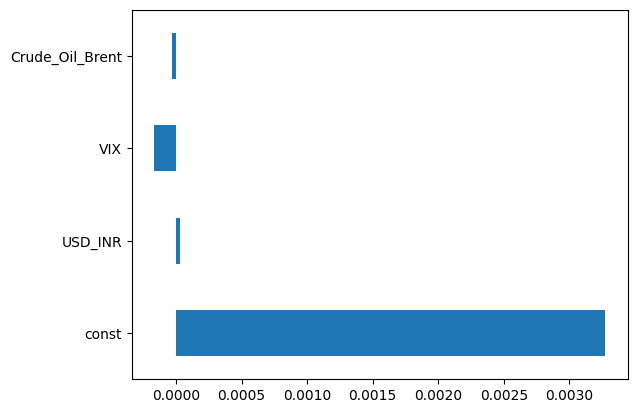

In [39]:
#Analyzing to which factor is the portfolio most sensitive to
model.params.plot(kind='barh')

In [40]:
stress_USD_INR = pd.DataFrame({
    'const': [1],
    'USD_INR': [combined_df['USD_INR'].mean() * 1.25],
    'India_VIX': [combined_df['VIX'].mean()],
    'Crude_Oil_Brent': [combined_df['Crude_Oil_Brent'].mean()]
})

predicted_return_USD_INR = model.predict(stress_USD_INR)
print(f"Expected Portfolio Return under stress: {predicted_return_USD_INR[0]:.4f}")


Expected Portfolio Return under stress: 0.0014


In [41]:
stress_VIX = pd.DataFrame({
    'const': [1],
    'USD_INR': [combined_df['USD_INR'].mean()],
    'India_VIX': [combined_df['VIX'].mean() * 2],
    'Crude_Oil_Brent': [combined_df['Crude_Oil_Brent'].mean()]
})

predicted_return_VIX = model.predict(stress_VIX)
print(f"Expected Portfolio Return under stress: {predicted_return_VIX[0]:.4f}")

Expected Portfolio Return under stress: -0.0020


In [42]:
stress_Crude_Oil = pd.DataFrame({
    'const': [1],
    'USD_INR': [combined_df['USD_INR'].mean()],
    'India_VIX': [combined_df['VIX'].mean()],
    'Crude_Oil_Brent': [combined_df['Crude_Oil_Brent'].mean() * 1.9]
})

predicted_return_Crude_Oil = model.predict(stress_Crude_Oil)
print(f"Expected Portfolio Return under stress: {predicted_return_Crude_Oil[0]:.4f}")

Expected Portfolio Return under stress: -0.0011


In [43]:
Update_Final_Dataset=pd.read_csv("Update_Final_Dataset.csv")
#Calculating the rolling VaR
window = 12
rolling_VaR = Update_Final_Dataset['Average_Monthly_Returns'].rolling(window=window).quantile(0.01)
rolling_VaR.head(36)

,Average_Monthly_Returns
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


<Axes: title={'center': 'Rolling 1 Year VaR'}>

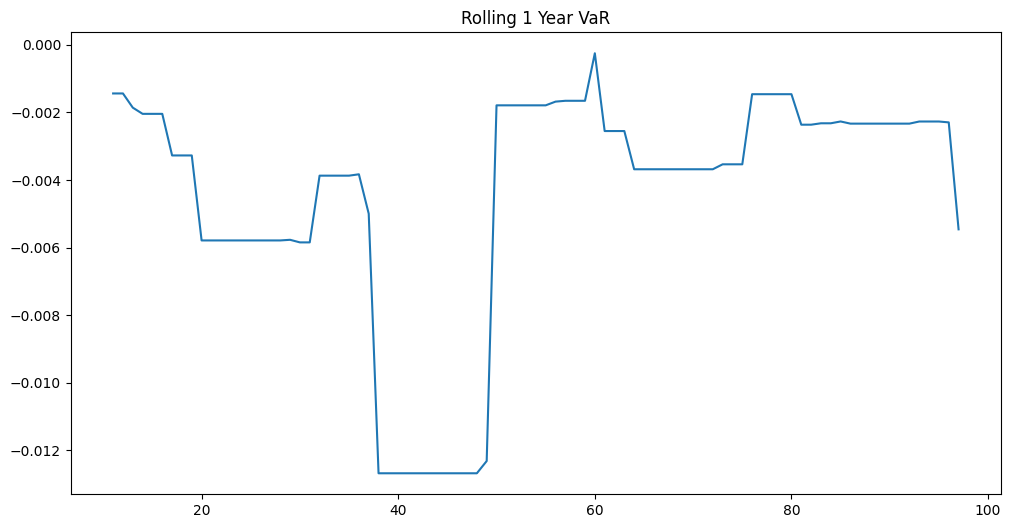

In [44]:
rolling_VaR.plot(figsize=(12,6), title="Rolling 1 Year VaR")

In [45]:
#Checking for portfolio performance


In [46]:
#Annualized results
mean_monthly_return = Update_Final_Dataset['Average_Monthly_Returns'].mean()
mean_monthly_return
annualized_return = mean_monthly_return * 12
annualized_return
#Portfolio gives an annual

np.float64(0.009699337224489797)

In [47]:
#Annualized Volatility
portfolio_log_returns = pd.read_csv("nifty10_log_returns.csv")
portfolio_log_returns['Date'] = pd.to_datetime(portfolio_log_returns['Date'])
portfolio_log_returns.head()
stock_volatility = portfolio_log_returns.std()*np.sqrt(252)
stock_volatility
portfolio_log_returns = portfolio_log_returns.set_index('Date')
portfolio_return = portfolio_log_returns.mean(axis=1)
portfolio_return
portfolio_volatility = portfolio_return.std()*np.sqrt(252)
annualized_volatility = portfolio_volatility
annualized_volatility

np.float64(0.19881322012062982)

In [48]:
#Sharpe Ratio
sharpe_ratio = annualized_return / annualized_volatility
print(sharpe_ratio)




0.048786178397013685


In [50]:
cumulative_returns = (1 + portfolio_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()
max_drawdown


-0.027436199887096224